In [91]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import spotipy as sp
import numbers
import spotipy.util as util
import matplotlib.pyplot as plt
import pickle
from collections import Counter

In [74]:


SPOTIPY_REDIRECT_URI='http://localhost:8888/callback'
SPOTIPY_CLIENT_SECRET='c02f97ddd119470d8e24b290722c7490'
SPOTIPY_CLIENT_ID='647ffb8c163b4882be0cafe4bf1352d5'
USERNAME='lh7smhcywr18vctg4xmnoehzu'
SCOPE='user-library-read'

token = util.prompt_for_user_token(username=USERNAME,
                           scope=SCOPE,
                           client_id=SPOTIPY_CLIENT_ID,
                           client_secret=SPOTIPY_CLIENT_SECRET,
                           redirect_uri=SPOTIPY_REDIRECT_URI)

s = sp.Spotify(auth=token)

In [17]:
s.track("6I1mI4a0ZO7AGPCpKKxGip")

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2QOIawHpSlOwXDvSqQ9YJR'},
    'href': 'https://api.spotify.com/v1/artists/2QOIawHpSlOwXDvSqQ9YJR',
    'id': '2QOIawHpSlOwXDvSqQ9YJR',
    'name': 'Antonio Vivaldi',
    'type': 'artist',
    'uri': 'spotify:artist:2QOIawHpSlOwXDvSqQ9YJR'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/0sw0ZujTlpvzNDNPOXOKGC'},
    'href': 'https://api.spotify.com/v1/artists/0sw0ZujTlpvzNDNPOXOKGC',
    'id': '0sw0ZujTlpvzNDNPOXOKGC',
    'name': 'Gwennaëlle Alibert',
    'type': 'artist',
    'uri': 'spotify:artist:0sw0ZujTlpvzNDNPOXOKGC'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/6we3QFWKqhaa2lJESUd665'},
    'href': 'https://api.spotify.com/v1/artists/6we3QFWKqhaa2lJESUd665',
    'id': '6we3QFWKqhaa2lJESUd665',
    'name': 'Clément Geoffroy',
    'type': 'artist',
    'uri': 'spotify:artist:6we3QFWKqhaa2lJESUd665'}],
  'available_markets': ['AD',

In [4]:
names = ["classical_metafeatures", "hiphop_metafeatures", "rock_metafeatures", "house_metafeatures", "hardcore_metafeatures", "jazz_metafeatures", "k-pop_metafeatures", "grunge_metafeatures"]


In [71]:
data = pd.read_pickle("datasets/" + names[3])

In [72]:
def getTitle(trackid):
    
    return s.track(trackid)["name"]

In [75]:
data["title"] = data["track id"].apply(getTitle)

retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...5secs
retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying .

In [79]:
pickle.dump(data, open('datasets/house_metafeatures', 'wb'))


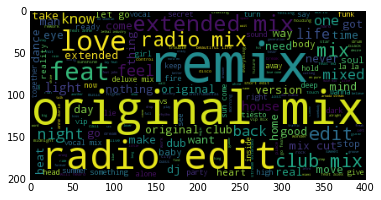

In [84]:
datahouse = pd.read_pickle("datasets/" + names[3])
cloudy = WordCloud().generate(" ".join(datahouse["title"]).lower())
plt.imshow(cloudy)
plt.show()

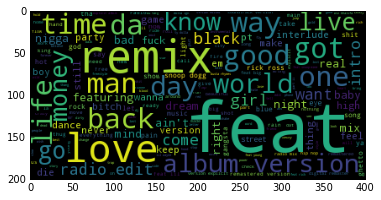

In [85]:
datahiphop = pd.read_pickle("datasets/" + names[1])

cloudy = WordCloud().generate(" ".join(datahiphop["title"]).lower())
plt.imshow(cloudy)
plt.show()

## Size of vocabulary

In [88]:
print("hiphop unique words: ", len(set(" ".join(datahiphop["title"]).lower().split())))
print("house unique words: ", len(set(" ".join(datahouse["title"]).lower().split())))

hiphop unique words:  7473
house unique words:  6879


## Zipfs law

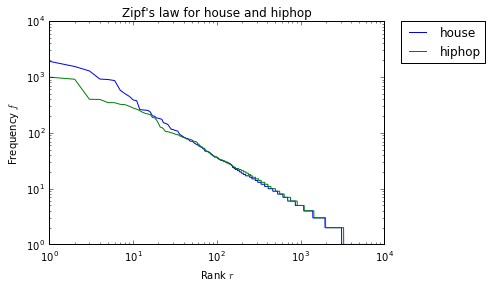

In [100]:
# plot house zipfslaw
word_dict = Counter(" ".join(datahouse["title"]).lower().split())
X = range(0, len(word_dict.values()))
Y = sorted(word_dict.values())[::-1]
plt.loglog(X, Y, label="house")

# plot hiphop zipfslaw
word_dict = Counter(" ".join(datahiphop["title"]).lower().split())
X = range(0, len(word_dict.values()))
Y = sorted(word_dict.values())[::-1]
plt.loglog(X, Y, label="hiphop")


plt.yscale('log')
plt.title("Zipf's law for house and hiphop")
plt.xlabel("Rank $r$")
plt.ylabel("Frequency $f$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()